# Gradient Descent on Mt. Fuji

## 1. About This Text
The assignment requires learners to:
- Get familiar with the NumPy mathematical library
- Learn how gradient descent works by analogy to descending a mountain

The goal is to implement a simple 1D gradient descent using **Mt. Fuji cross-section elevation data** as the objective function.

## 2. Fuji Shimoyama Problem
Gradient descent can be likened to descending a mountain or valley.  
This assignment uses Mt. Fuji elevation data along a cross-section as the objective function to minimize.

## 3. Descending from Mt. Fuji - Load Elevation Data
Ensure `mtfuji_data.csv` is accessible by this notebook.


In [1]:
import pandas as pd
df = pd.read_csv("mtfuji_data.csv")
df.head()

,x,lat,lng,elevation,distance
0,0,35.134141,139.132082,0.0,0
1,1,35.135826,139.129202,0.0,322
2,2,35.137510,139.126322,0.0,644
3,3,35.139194,139.123441,0.0,966
4,4,35.140878,139.120560,0.0,1288


In [6]:
df.isna().sum()

,0
x,0
lat,0
lng,0
elevation,0
distance,0


Based on the short data exploration above, the dataset has the following columns; **point index**, latitude, longitude, **elevation [m]**, distance from point 0 [m].  
There are 300 points, with no missing values in any column

In [9]:
# But the dataset intends to sharpen numpy skills, let's proceed with the library
import numpy as np

csv_path = "mtfuji_data.csv"  # file should be in the same directory
np.set_printoptions(suppress=True)  # avoid scientific notation

# Load CSV (skip header)
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)
# Columns: [idx, lat, lon, elev, dist]
idx = fuji[:, 0].astype(int)
elev = fuji[:, 3]
dist = fuji[:, 4]

print("Loaded shape:", fuji.shape)
print("Index range:", int(idx.min()), "to", int(idx.max()))
print("Elevation preview:", elev[:5])

Loaded shape: (300, 5)
Index range: 0 to 299
Elevation preview: [0. 0. 0. 0. 0.]


In [16]:
print(fuji[280:299])

[[  280.          35.602995   138.32092   1309.46     90221.      ]
 [  281.          35.60466    138.318006  1337.45     90543.      ]
 [  282.          35.606324   138.315092  1199.98     90865.      ]
 [  283.          35.607989   138.312178   916.3      91187.      ]
 [  284.          35.609653   138.309264  1037.93     91509.      ]
 [  285.          35.611317   138.306349  1154.9      91832.      ]
 [  286.          35.612982   138.303435  1372.58     92154.      ]
 [  287.          35.614646   138.30052   1510.22     92476.      ]
 [  288.          35.61631    138.297606  1681.01     92798.      ]
 [  289.          35.617974   138.294691  1732.79     93121.      ]
 [  290.          35.619638   138.291776  1918.68     93443.      ]
 [  291.          35.621302   138.288861  2102.67     93765.      ]
 [  292.          35.622966   138.285946  2213.03     94087.      ]
 [  293.          35.624629   138.28303   2158.71     94409.      ]
 [  294.          35.626293   138.280115  2084.5

## **Question 1** Data Visualization
Plot point index (x-axis) vs. elevation (y-axis) to see the cross-section of Mt. Fuji.

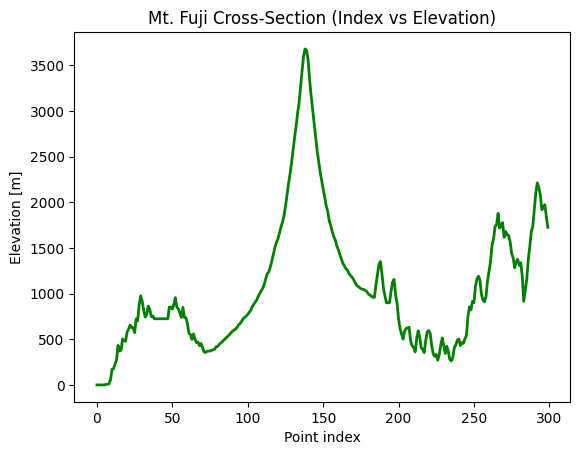

In [11]:
import matplotlib.pyplot as plt

plt.title("Mt. Fuji Cross-Section (Index vs Elevation)")
plt.xlabel("Point index")
plt.ylabel("Elevation [m]")
plt.plot(idx, elev, linewidth=2, color='green')
plt.show()

## **Question 2** Function to Compute Gradient at Current Point
Approximate the **local gradient** at a point `i` using adjacent difference between the current point and the **previous** point:

Note:
- This uses only the slope - current vs. previous point.
- For `i = 0`, the gradient is undefined (no previous point).

In [27]:
def gradient_at(i, x_idx, y_elev):
    """Compute local gradient at point i using previous point (i-1).
    Returns np.nan if i <= 0 or index gap is zero.
    """
    if i <= 0:
        return np.nan
    dx = x_idx[i] - x_idx[i-1] # numerator
    if dx == 0:
        return np.nan
    dy = y_elev[i] - y_elev[i-1] # denominator
    return dy / dx # slope

# Example, near summit
g_128 = gradient_at(128, idx, elev) if 128 < len(idx) else np.nan # try a diff. number
print("Gradient at i=128:", g_128)

Gradient at i=128: 110.31999999999971


## **Question 3** Function to Compute the Next Point
Given current index `i` and learning rate \(alpha\), compute:


- Round the result to the nearest integer to pick a valid index.
- If the next index is out of bounds, stop.
- Suggested \(alpha = 0.2\).


In [28]:
def next_index(i, x_idx, y_elev, alpha=0.2):
    g = gradient_at(i, x_idx, y_elev)
    if np.isnan(g):
        return i, g
    j_float = i - alpha * g
    j = int(np.round(j_float))
    if j < 0 or j >= len(x_idx):
        return i, g
    return j, g

print("Next index from 128:", next_index(128, idx, elev, alpha=0.2))

Next index from 128: (106, np.float64(110.31999999999971))


## **Question 4** Descent Function
Start from an initial index and repeatedly update until movement stops or bounds are hit.
Start at **point 136** (near summit).


In [30]:
def descend(initial_i=136, alpha=0.2, x_idx=idx, y_elev=elev, max_steps=10000):
    path = [initial_i]
    grads = []
    i = initial_i
    for _ in range(max_steps):
        j, g = next_index(i, x_idx, y_elev, alpha=alpha)
        grads.append(g)
        if j == i or np.isnan(g):
            break
        path.append(j)
        i = j
    return np.array(path, dtype=int), np.array(grads, dtype=float)

path_136, grads_136 = descend(initial_i=136, alpha=0.2)
print("Path length:", len(path_136), "Start:", path_136[0], "End:", path_136[-1])

Path length: 14 Start: 136 End: 75


## **Question 5** Visualization of the Descent Process
- Cross-section with visited points
- Elevation vs iteration
- Gradient vs iteration

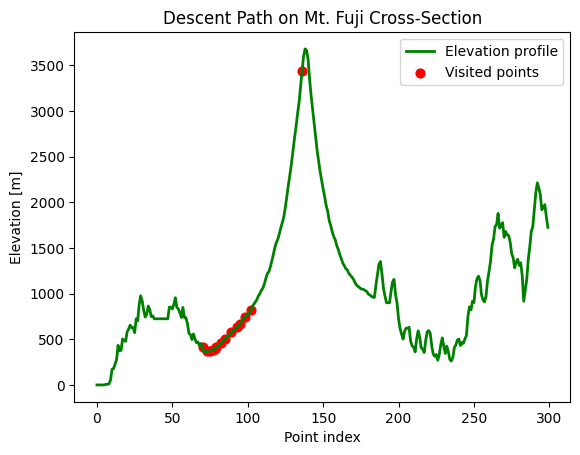

In [33]:
plt.title("Descent Path on Mt. Fuji Cross-Section")
plt.xlabel("Point index")
plt.ylabel("Elevation [m]")
plt.plot(idx, elev, linewidth=2, label="Elevation profile", color="green")
plt.scatter(path_136, elev[path_136], s=40, label="Visited points", color="red")
plt.legend()
plt.show()

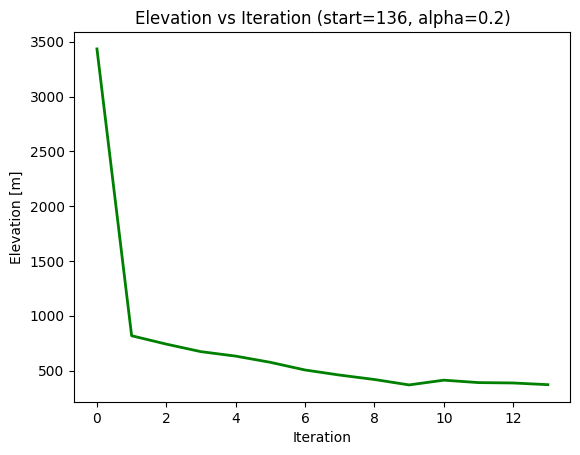

In [36]:
iters = np.arange(len(path_136))
plt.title("Elevation vs Iteration (start=136, alpha=0.2)")
plt.xlabel("Iteration")
plt.ylabel("Elevation [m]")
plt.plot(iters, elev[path_136], linewidth=2, color="green")
plt.show()

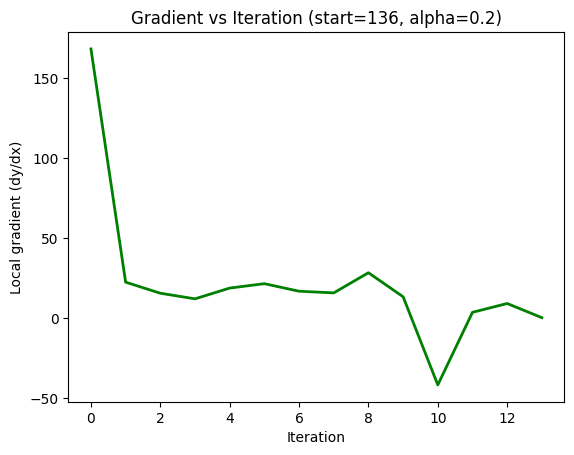

In [37]:
plt.title("Gradient vs Iteration (start=136, alpha=0.2)")
plt.xlabel("Iteration")
plt.ylabel("Local gradient (dy/dx)")
plt.plot(np.arange(len(grads_136)), grads_136, linewidth=2, color="green")
plt.show()

## **Question 6** Changing the Initial Value
Allow the initial index to vary; compute descent paths for arbitrary starting points.


In [38]:
def paths_for_initials(initial_indices, alpha=0.2):
    results = {}
    for i0 in initial_indices:
        p, g = descend(initial_i=i0, alpha=alpha)
        results[i0] = (p, g)
    return results

initials = [120, 136, 142, 200]
paths = paths_for_initials(initials, alpha=0.2)
{ k: len(v[0]) for k, v in paths.items() }

{120: 15, 136: 14, 142: 10001, 200: 10001}


## **Question 7** Visualization for Several Initial Values
Plot the descent path overlays for a few different starting points.


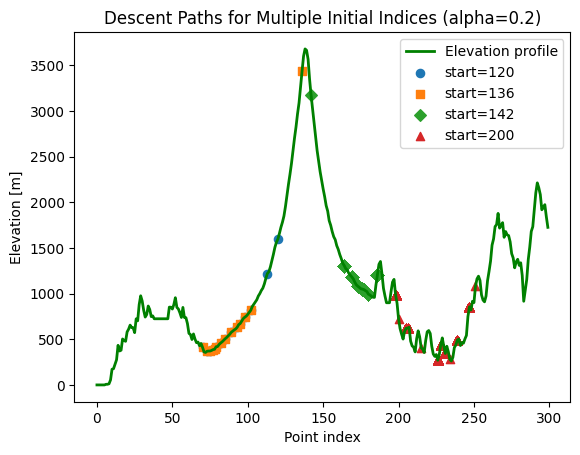

In [39]:
plt.title("Descent Paths for Multiple Initial Indices (alpha=0.2)")
plt.xlabel("Point index")
plt.ylabel("Elevation [m]")
plt.plot(idx, elev, linewidth=2, label="Elevation profile", color="green")

markers = ["o", "s", "D", "^", "v"]
for m, i0 in zip(markers, initials):
    p, _ = paths[i0]
    plt.scatter(p, elev[p], s=35, marker=m, label=f"start={i0}")

plt.legend()
plt.show()

## **Question 8** Varying the Learning Rate \(alpha\)
Visualize how changing \(alpha\) affects the descent trajectory from the same start (e.g., 136).

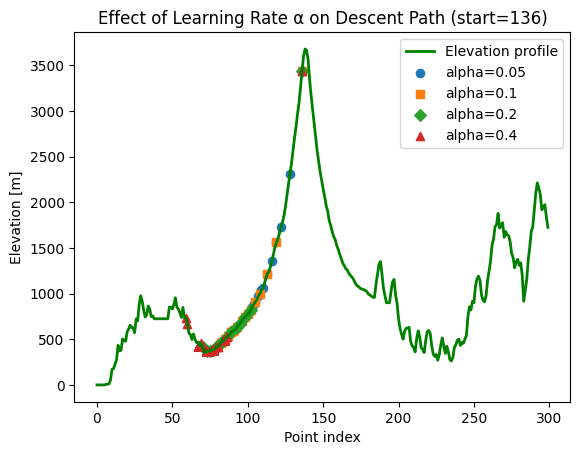

In [40]:
alphas = [0.05, 0.1, 0.2, 0.4]
plt.title("Effect of Learning Rate α on Descent Path (start=136)")
plt.xlabel("Point index")
plt.ylabel("Elevation [m]")
plt.plot(idx, elev, linewidth=2, label="Elevation profile", color="green")

markers = ["o", "s", "D", "^"]
for a, m in zip(alphas, markers):
    p, _ = descend(initial_i=136, alpha=a)
    plt.scatter(p, elev[p], s=35, marker=m, label=f"alpha={a}")

plt.legend()
plt.show()